In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice
from collections import defaultdict
from DataPreparation import *

/media/ngaggion/SSD1TB/miniconda3/envs/pytorch_geometric/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [26]:
output_dir = 'Outputs/Predictions/Skip/Corrupted/'

noise_skip = process_and_store_sigma(os.path.join(output_dir, 'Noise'))
gblur_skip = process_and_store_sigma(os.path.join(output_dir, 'Blurring/gaussian'))
mblur_skip = process_and_store_sigma(os.path.join(output_dir, 'Blurring/median'))
morphing_skip = process_and_store_sigma(os.path.join(output_dir, 'Morphing'))

output_dir = 'Outputs/Predictions/NoSkip/Corrupted/'

noise_noskip = process_and_store_sigma(os.path.join(output_dir, 'Noise'))
gblur_noskip = process_and_store_sigma(os.path.join(output_dir, 'Blurring/gaussian'))
mblur_noskip = process_and_store_sigma(os.path.join(output_dir, 'Blurring/median'))
morphing_noskip = process_and_store_sigma(os.path.join(output_dir, 'Morphing'))

# Plot results
#gblur_skip_subset = dict(islice(gblur_skip.items(), 9))
#fig, ax = plot_sigmas_mean(gblur_skip_subset)

### Gaussian noise

Incerteza global (posterior) promediada para cada imagen

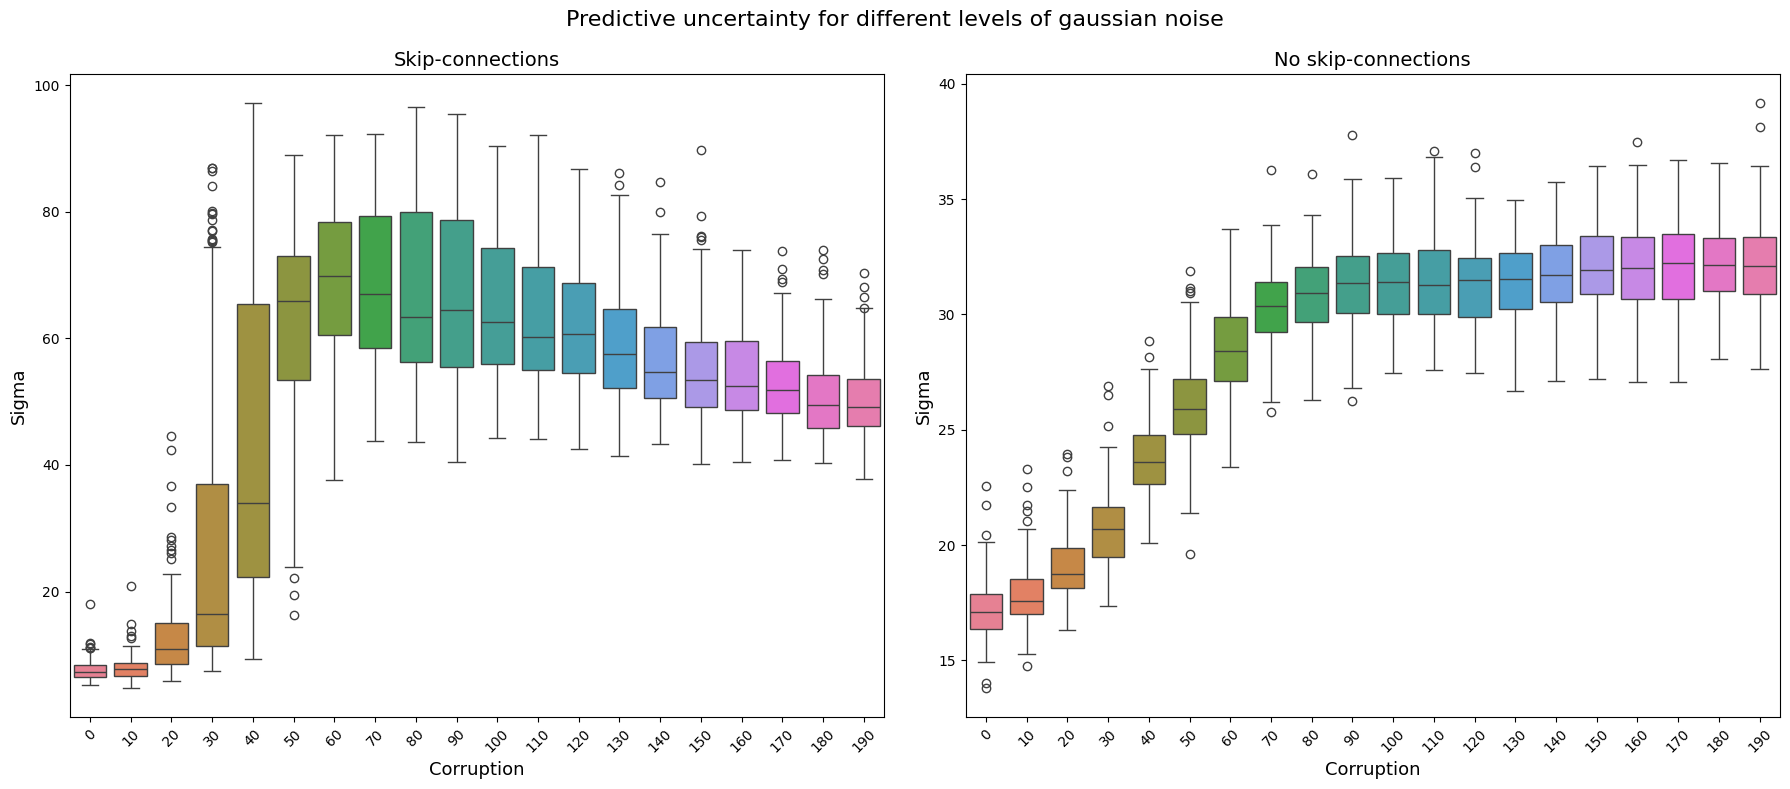

In [27]:
sigmas_global_skip = defaultdict(list)
sigmas_global_noskip = defaultdict(list)

for val in noise_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_skip[corr_level].append(sigma.mean())

for val in noise_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_noskip[corr_level].append(sigma.mean())

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

plot_global_uncertainty(sigmas_global_skip, title='Skip-connections', ax=axs[0])
plot_global_uncertainty(sigmas_global_noskip, title='No skip-connections', ax=axs[1])

fig.suptitle('Predictive uncertainty for different levels of gaussian noise', fontsize=16)
fig.subplots_adjust(top=0.9, wspace=0.1)

Incerteza a nivel nodo para cada imagen

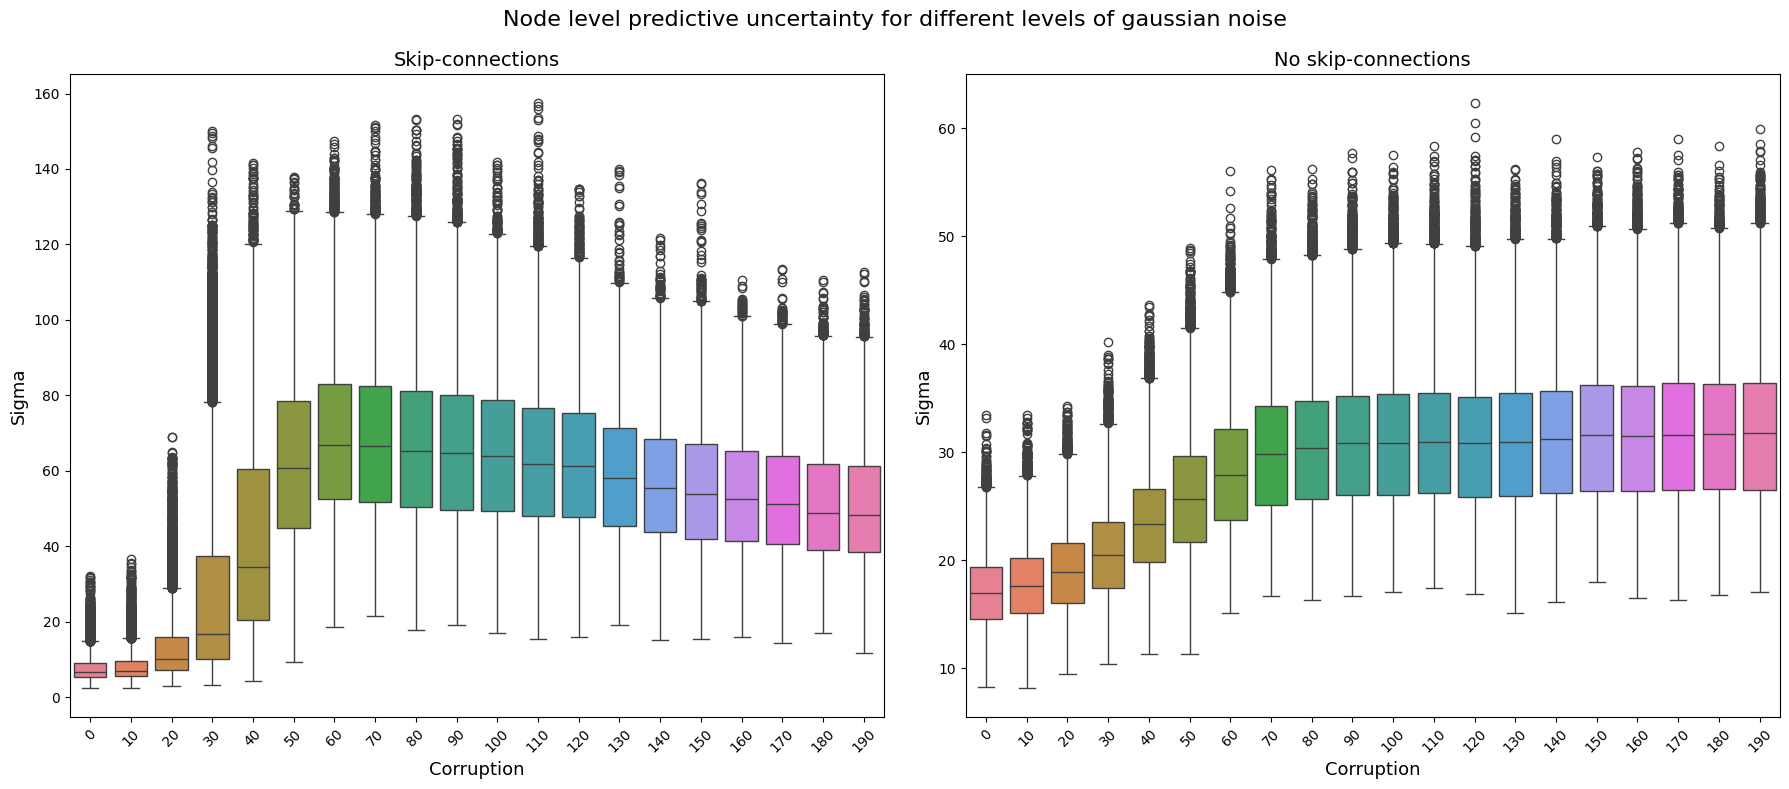

In [28]:
sigmas_global_skip = defaultdict(list)
sigmas_global_noskip = defaultdict(list)

for val in noise_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_skip[corr_level].append(sigma)

for val in noise_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_noskip[corr_level].append(sigma)

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

plot_global_uncertainty(sigmas_global_skip, title='Skip-connections', ax=axs[0])
plot_global_uncertainty(sigmas_global_noskip, title='No skip-connections', ax=axs[1])

fig.suptitle('Node level predictive uncertainty for different levels of gaussian noise', fontsize=16)
fig.subplots_adjust(top=0.9, wspace=0.1)

Incerteza promedio en espacio latente para distintas imagenes y niveles de corrupcion

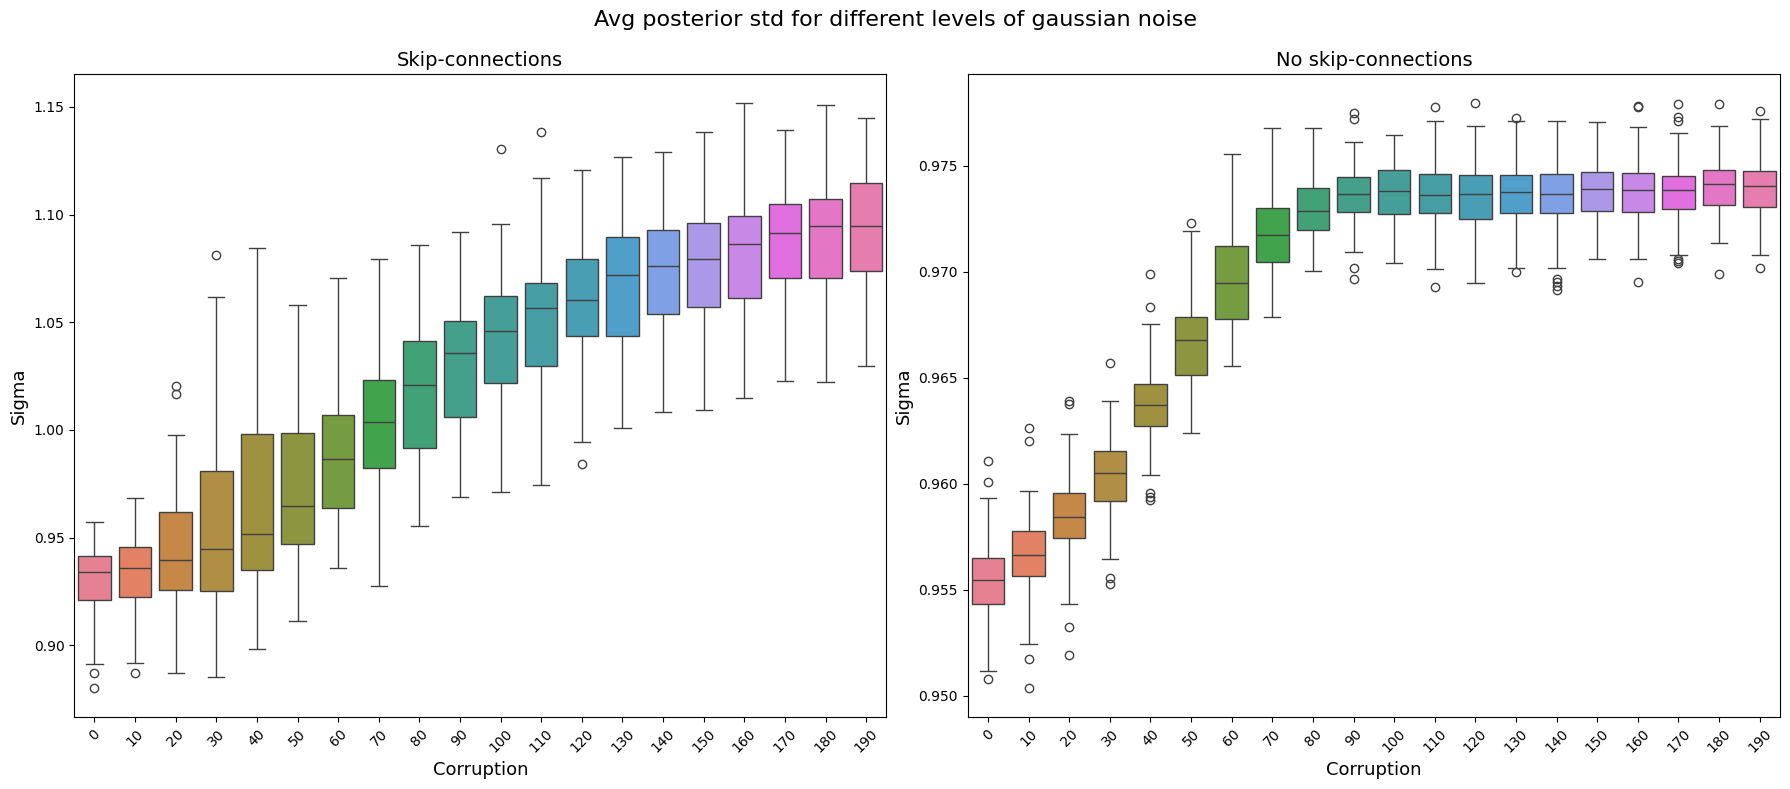

In [29]:
sigmas_global_skip = defaultdict(list)
file_path_skip = 'Outputs/Predictions/Skip/Corrupted/Noise/'
latent_sigmas_skip = read_sigma_files(file_path_skip)

sigmas_global_noskip = defaultdict(list)
file_path_noskip = 'Outputs/Predictions/NoSkip/Corrupted/Noise/'
latent_sigmas_noskip = read_sigma_files(file_path_noskip)

for val in latent_sigmas_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_skip[corr_level].append(sigma.mean())

for val in latent_sigmas_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_noskip[corr_level].append(sigma.mean())

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
plot_global_uncertainty(sigmas_global_skip, title='Skip-connections', ax=axs[0])
plot_global_uncertainty(sigmas_global_noskip, title='No skip-connections', ax=axs[1])

fig.suptitle('Avg posterior std for different levels of gaussian noise', fontsize=16)
fig.subplots_adjust(top=0.9, wspace=0.1)

### Gaussian blur

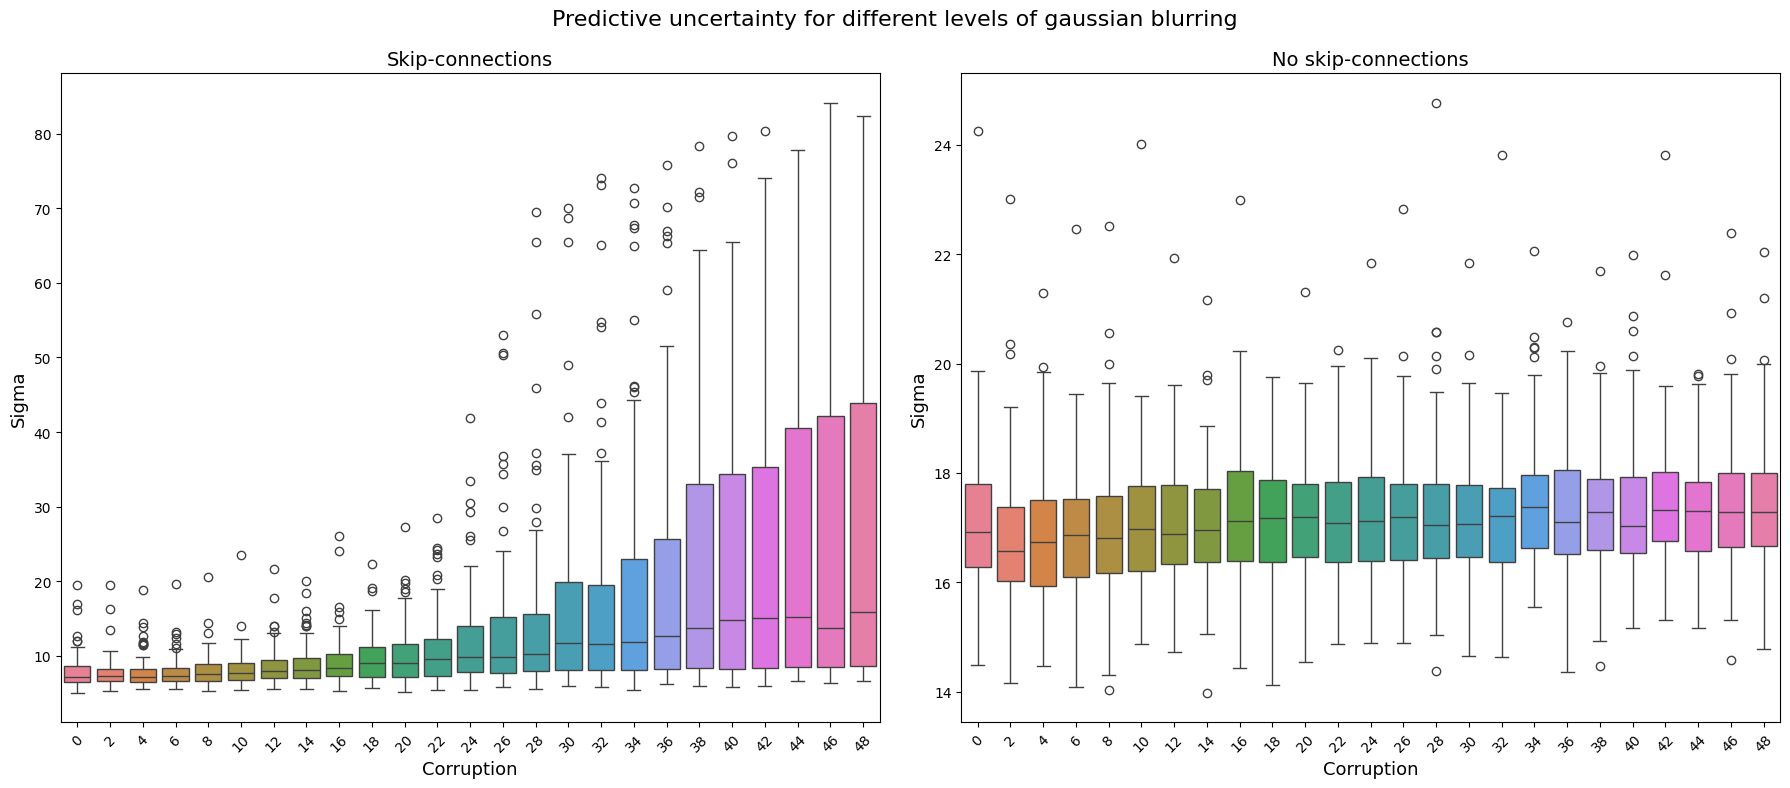

In [44]:
sigmas_global_skip = defaultdict(list)
sigmas_global_noskip = defaultdict(list)

for val in gblur_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_skip[corr_level].append(sigma.mean())

for val in gblur_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_noskip[corr_level].append(sigma.mean())

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

plot_global_uncertainty(sigmas_global_skip, title='Skip-connections', ax=axs[0])
plot_global_uncertainty(sigmas_global_noskip, title='No skip-connections', ax=axs[1])

fig.suptitle('Predictive uncertainty for different levels of gaussian blurring', fontsize=16)
fig.subplots_adjust(top=0.9, wspace=0.1)

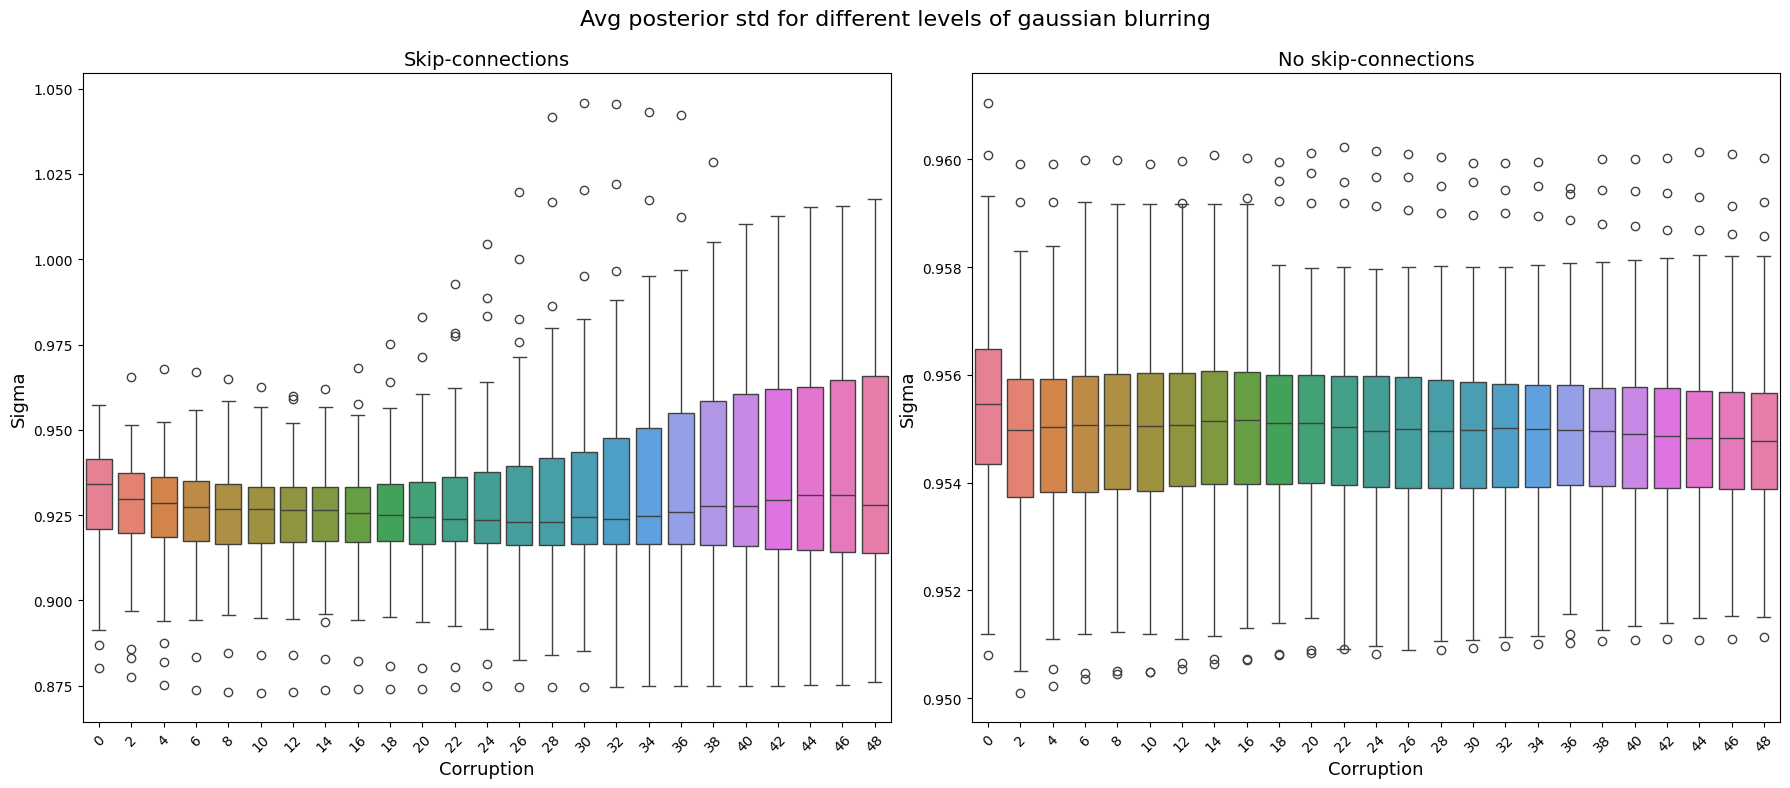

In [46]:
sigmas_global_skip = defaultdict(list)
file_path_skip = 'Outputs/Predictions/Skip/Corrupted/Blurring/gaussian'
latent_sigmas_skip = read_sigma_files(file_path_skip)

sigmas_global_noskip = defaultdict(list)
file_path_noskip = 'Outputs/Predictions/NoSkip/Corrupted/Blurring/gaussian'
latent_sigmas_noskip = read_sigma_files(file_path_noskip)

for val in latent_sigmas_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_skip[corr_level].append(sigma.mean())

for val in latent_sigmas_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_noskip[corr_level].append(sigma.mean())

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
plot_global_uncertainty(sigmas_global_skip, title='Skip-connections', ax=axs[0])
plot_global_uncertainty(sigmas_global_noskip, title='No skip-connections', ax=axs[1])

fig.suptitle('Avg posterior std for different levels of gaussian blurring', fontsize=16)
fig.subplots_adjust(top=0.9, wspace=0.1)

### Image morphing

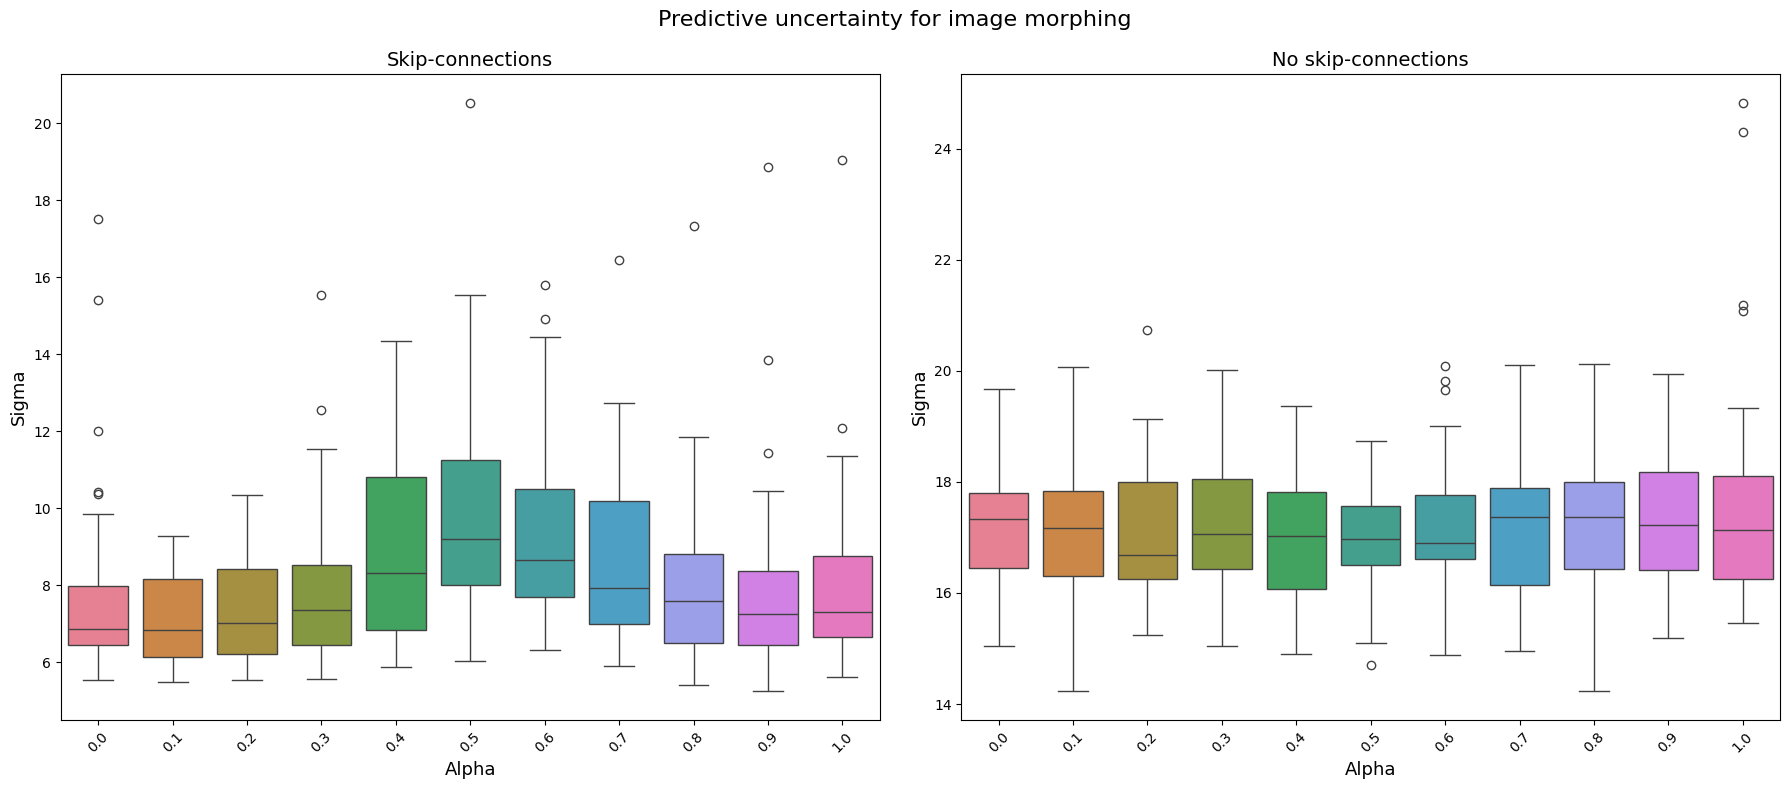

In [50]:
sigmas_global_skip = defaultdict(list)
sigmas_global_noskip = defaultdict(list)

for val in morphing_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_skip[corr_level].append(sigma.mean())

for val in morphing_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_noskip[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global_skip = dict(zip(keys, sigmas_global_skip.values()))
sigmas_global_noskip = dict(zip(keys, sigmas_global_noskip.values()))

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
plot_global_uncertainty(sigmas_global_skip, title='Skip-connections', ax=axs[0])
plot_global_uncertainty(sigmas_global_noskip, title='No skip-connections', ax=axs[1])

axs[0].set_xlabel('Alpha')
axs[1].set_xlabel('Alpha')
fig.suptitle('Predictive uncertainty for image morphing', fontsize=16)
fig.subplots_adjust(top=0.9, wspace=0.1)

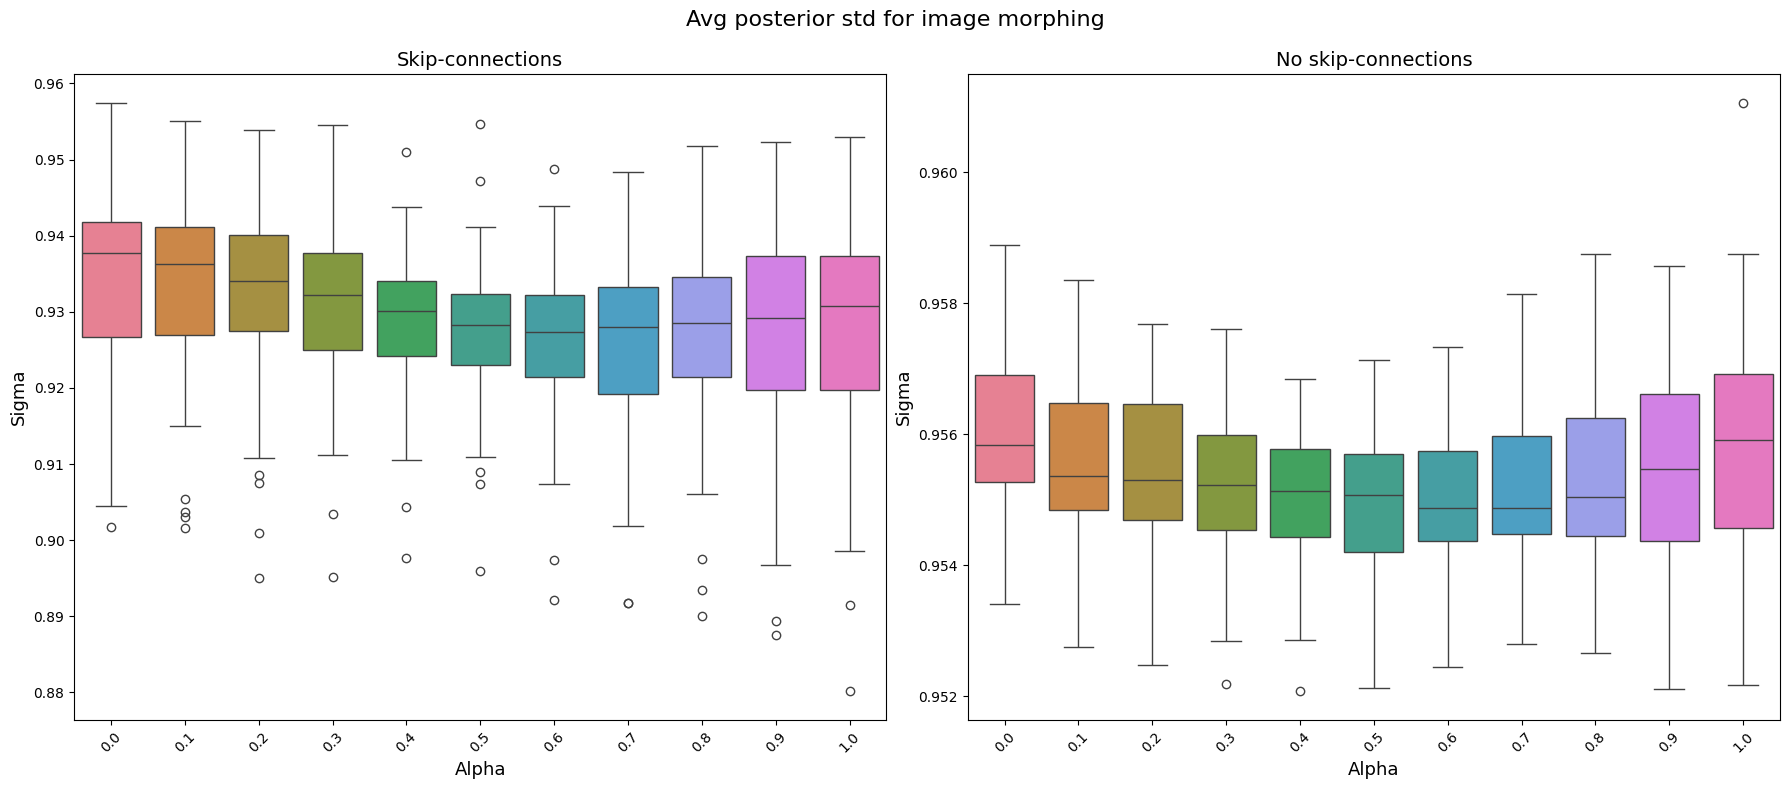

In [52]:
sigmas_global_skip = defaultdict(list)
file_path_skip = 'Outputs/Predictions/Skip/Corrupted/Morphing'
latent_sigmas_skip = read_sigma_files(file_path_skip)

sigmas_global_noskip = defaultdict(list)
file_path_noskip = 'Outputs/Predictions/NoSkip/Corrupted/Morphing'
latent_sigmas_noskip = read_sigma_files(file_path_noskip)

for val in latent_sigmas_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_skip[corr_level].append(sigma.mean())

for val in latent_sigmas_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global_noskip[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global_skip = dict(zip(keys, sigmas_global_skip.values()))
sigmas_global_noskip = dict(zip(keys, sigmas_global_noskip.values()))

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
plot_global_uncertainty(sigmas_global_skip, title='Skip-connections', ax=axs[0])
plot_global_uncertainty(sigmas_global_noskip, title='No skip-connections', ax=axs[1])

axs[0].set_xlabel('Alpha')
axs[1].set_xlabel('Alpha')
fig.suptitle('Avg posterior std for image morphing', fontsize=16)
fig.subplots_adjust(top=0.9, wspace=0.1)

### Error

In [70]:
#output_dir_skip = 'Outputs/Predictions/Skip/Corrupted/Blurring/gaussian'
#output_dir_noskip = 'Outputs/Predictions/NoSkip/Corrupted/Blurring/gaussian'
output_dir_skip = 'Outputs/Predictions/Skip/Corrupted/Occlusion/'
output_dir_noskip = 'Outputs/Predictions/NoSkip/Corrupted/Occlusion/'

def collect_errors_and_sigmas(output_dir):
    mean_errors, mean_sigmas = [], []        
    node_err, node_sigmas = [], []

    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                error, sigmas = get_error(root, file)
                
                mean_errors.append(error.mean())
                mean_sigmas.append(sigmas.mean())

                node_err.extend(error)
                node_sigmas.extend(sigmas)
    
    return mean_errors, mean_sigmas, node_err, node_sigmas

# Collect data
mean_errors_skip, mean_sigmas_skip, _, _ = collect_errors_and_sigmas(output_dir_skip)
mean_errors_noskip, mean_sigmas_noskip, _, _ = collect_errors_and_sigmas(output_dir_noskip)

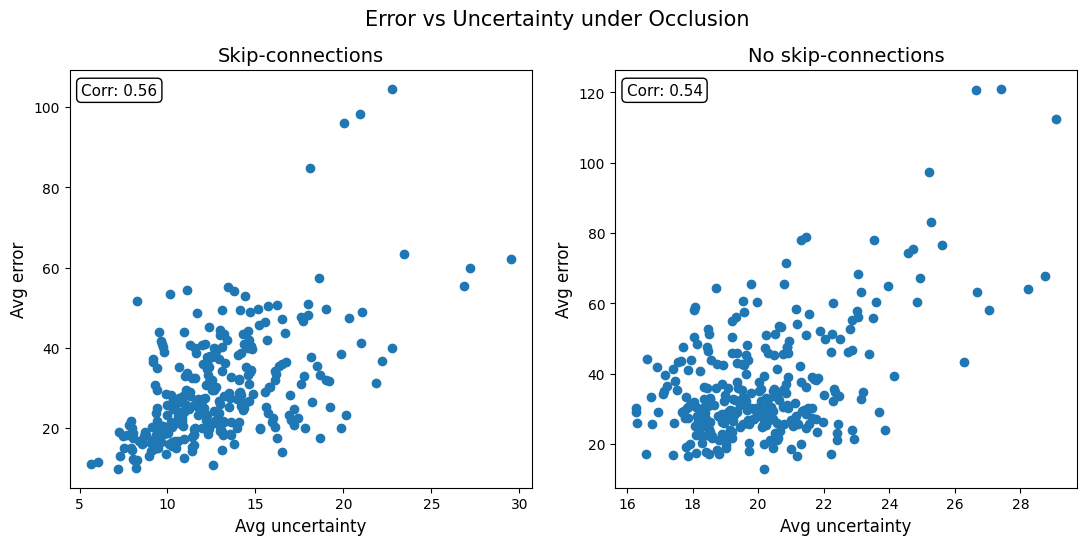

In [71]:
# Plot
fig, axs = plt.subplots(1, 2, figsize=(13, 5.5))

# Skip
corr_skip = np.corrcoef(mean_sigmas_skip, mean_errors_skip)[0, 1]
axs[0].scatter(mean_sigmas_skip, mean_errors_skip)
axs[0].set_title('Skip-connections', fontsize=14)
axs[0].set_xlabel('Avg uncertainty', fontsize=12)
axs[0].set_ylabel('Avg error', fontsize=12)
axs[0].annotate(
    f'Corr: {corr_skip:.2f}',
    xy=(0.025, 0.94),
    xycoords='axes fraction',
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white')
)

# No skip
corr_noskip = np.corrcoef(mean_sigmas_noskip, mean_errors_noskip)[0, 1]
axs[1].scatter(mean_sigmas_noskip, mean_errors_noskip)
axs[1].set_title('No skip-connections', fontsize=14)
axs[1].set_xlabel('Avg uncertainty', fontsize=12)
axs[1].set_ylabel('Avg error', fontsize=12)
axs[1].annotate(
    f'Corr: {corr_noskip:.2f}',
    xy=(0.025, 0.94),
    xycoords='axes fraction',
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white')
)

fig.suptitle('Error vs Uncertainty under Occlusion', fontsize=15)
fig.subplots_adjust(top=0.87, wspace=0.18)

plt.show()